# Linear regression

Import all the modules you will need in this notebook here:

In [89]:
# exercise 0
# Put your solution here!
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os, math
from collections import Counter

import statsmodels
from sklearn.metrics import accuracy_score
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
import sklearn

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [66]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
path_and_file = get_path("fram.txt")
fram = pd.read_csv(path_and_file, sep="\t")
print("Head of the dataframe: ")
print(fram.head())
print("Info the dataframe: ")
print(fram.info())
print("Description o the dataframe:")
fram.describe()

Head of the dataframe: 
     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD YRS_CHD  DEATH  \
0  4988  female   57  135  186    NaN  120   150    0    1     pre      7   
1  3001  female   60  123  165    NaN  100   167   25    0      16     10   
2  5079  female   54  115  140    NaN   90   213    5    0       8      8   
3  5162  female   52  102  170    NaN  104   280   15    0      10      7   
4  4672  female   45   99  185    NaN  105   326   20    0       8     10   

   YRS_DTH    CAUSE  
0       11  unknown  
1       17  unknown  
2       13  unknown  
3       11  unknown  
4       17  unknown  
Info the dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 14 columns):
ID         1394 non-null int64
SEX        1394 non-null object
AGE        1394 non-null int64
FRW        1394 non-null int64
SBP        1394 non-null int64
SBP10      767 non-null float64
DBP        1394 non-null int64
CHOL       1394 non-null int64
CIG

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [52]:
# exercise 2
# Put your solution here!
def rescale(series_obj=None):
    if series_obj is not None:
        return (series_obj - series_obj.mean() )/ (2 * series_obj.std()) # x-mean(x)/2*sigma

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [213]:
# exercise 3
# Put your solution here!

numeric_cols = list(fram.select_dtypes([np.int64, np.float64]).columns)
# print(numeric_cols)
numeric_cols.remove("ID")
for col_name in numeric_cols:
    fram['s'+col_name] = rescale(fram[col_name])
fram.head()

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,...,ssFRW,ssSBP,ssSBP10,ssDBP,ssCHOL,ssCIG,ssCHD,ssDEATH,ssYRS_DTH,sHIGH_BP
0,4988,female,57,135,186,NaN,120,150,0,1,...,0.834668,0.676501,NaN,1.049625,-0.914016,-0.346569,-0.035923,0.827181,-0.665514,0.366826
1,3001,female,60,123,165,NaN,100,167,25,0,...,0.496687,0.301796,NaN,0.346698,-0.730446,0.732493,-0.227056,1.295472,0.099516,0.366826
2,5079,female,54,115,140,NaN,90,213,5,0,...,0.271367,-0.144281,NaN,-0.004765,-0.233727,-0.130757,-0.227056,0.983278,-0.410504,0.366826
3,5162,female,52,102,170,NaN,104,280,15,0,...,-0.094779,0.391012,NaN,0.487283,0.489755,0.300868,-0.227056,0.827181,-0.665514,0.366826
4,4672,female,45,99,185,NaN,105,326,20,0,...,-0.179274,0.658658,NaN,0.522430,0.986475,0.516680,-0.227056,1.295472,0.099516,0.366826


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [211]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 04 May 2020   Prob (F-statistic):           4.13e-40
Time:                        16:52:12   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [210]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.44e-46
Time:                        16:52:01   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Your solution here

***
 **My Solution:**
 1. Comparing to Exercise 4, in Exercise 5 We have added a new explanatory variable ot the model. It's the sAGE.
 2. We can identify the important explanatory variables from the co-efficient values in the summary() results.
 3. According to the co-efficients the sAGE doesnt contribute much to the model, since even after its inclusion
     in the model, sFRW remains "THE" important explanatory variable. (16.9771  > 8.1332)
 4. Furthermore, we can definitely say that there isn't any significant changes to the model after adding the sAGE
     by comparing the following values from the summary() results of exercise 4 and 5.
       R-squared, Adj. R-squared, AIC, BIC

Try to add to the model all the interactions with other variables. 

In [212]:
# exercise 6
# Put your solution here! sFRW + SEX + sCHOL + sAGE
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 04 May 2020   Prob (F-statistic):           4.92e-43
Time:                        16:54:34   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
SEX[T.male]:sCHOL     1.0231      2.933      0.349      0.727      -4.730       6.776
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
SEX[T.male]:sAGE     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sFRW:sCHOL            4.9729      2.718      1.829      0.068      -0.359      10.305
sFRW:sAGE            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sCHOL:sAGE           -4.7564      3.044     -1.563      0.118     -10.728       1.215
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

In [82]:
print(fram['sAGE'].min(), fram['sAGE'].max(), fram['sAGE'].median())
print(fram['AGE'].min(), fram['AGE'].max(), fram['AGE'].median())
print(fram['SBP'].min(), fram['SBP'].max())
print(fram['sFRW'].min(), fram['sFRW'].max())

-0.7770702773838782 1.000612069700121 -0.04508342858458437
45 62 52.0
90 300
-1.5030325303622347 3.2850285125763254


In [98]:
# what are the params?
p=fit.params
p

Intercept            150.543854
SEX[T.male]           -4.730869
sFRW                  16.644973
sFRW:SEX[T.male]       1.667323
sCHOL                  3.618124
SEX[T.male]:sCHOL      1.023083
sAGE                  10.218851
SEX[T.male]:sAGE      -4.292337
sFRW:sCHOL             4.972936
sFRW:sAGE             -2.086574
sCHOL:sAGE            -4.756423
dtype: float64

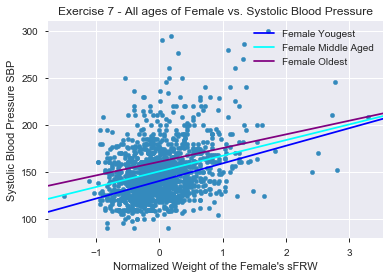

In [215]:
# exercise 7
# Put your solution here!
# the model focusses on weight against blood pressure, so this is for female and specific age(normalized)
fram.plot.scatter("sFRW", "SBP")

intercept = fit.params.Intercept - fit.params["sAGE"]
slope = fit.params.sFRW - fit.params["sFRW:sAGE"]
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="blue", label="Female Yougest")

intercept = fit.params.Intercept
slope = fit.params.sFRW
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="cyan", label="Female Middle Aged")

intercept = fit.params.Intercept + fit.params["sAGE"]
slope = fit.params.sFRW + fit.params["sFRW:sAGE"]
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="purple", label="Female Oldest")

plt.title("Exercise 7 - All ages of Female vs. Systolic Blood Pressure")
plt.xlabel("Normalized Weight of the Female's sFRW")
plt.ylabel("Systolic Blood Pressure SBP")
plt.legend()

How does the dependence of blood pressure on weight change as a person gets older?
***

Your solution here.

***

**My Solutuion:**
1. The above plot is comapring the weight of females against Systolic Blood Pressure.
2. The three lines in the above scatter plots refers to the average weight of the Females according to their age. 
    (Refer legend about the grouped age)
3. It clearly shows that the SBP is higher in younger females than the middle and older aged females.
4. **So the dependence of blood pressure on the weight of the individual decreases when the person gets older.**

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

<Figure size 800x960 with 0 Axes>

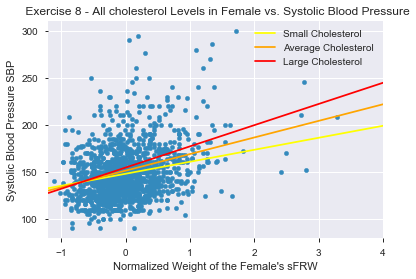

In [258]:
# exercise 8
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE + sFRW:sCIG + SEX:sCIG + sCHOL:sCIG + sAGE:sCIG', data=fram).fit()
fit.summary()

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

fram.plot.scatter("sFRW", "SBP")

intercept = fit.params.Intercept - fit.params["sCHOL"]
slope = fit.params.sFRW - fit.params["sFRW:sCHOL"]
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="yellow", label="Small Cholesterol")

intercept = fit.params.Intercept
slope = fit.params.sFRW
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="orange", label="Average Cholesterol")

intercept = fit.params.Intercept + fit.params["sCHOL"]
slope = fit.params.sFRW + fit.params["sFRW:sCHOL"]
abline_plot(intercept=intercept, slope=slope, ax=plt.gca(), color="red", label="Large Cholesterol")

plt.title(" Exercise 8 - All cholesterol Levels in Female vs. Systolic Blood Pressure")
plt.xlabel("Normalized Weight of the Female's sFRW")
plt.ylabel("Systolic Blood Pressure SBP")
plt.xlim(-1.2, 4.0)
plt.legend()

How does the model and its accuracy look?

***

Your solution here.

***
**My Solution:**
1. R-squared looks very minutely better than the previsous exercise 7. But not significant enough.
2. But the correlation among the Person's Weight and the Systolic Blood Pressure in Y-axis is very good and clear.
    Refer above scatter plot and the abline_plot representing the levels of CHOL in a person. 
3. Small Cholesterol levels in a person indicates they will have a lower Blood Pressure - Refer Yellow line abline_plot
4. Similarly large cholesterol levels indicates that a person will have higher blood pressure.
5. test_train_split had not been implemented yet to check the accuracy of the model. But visual inspection indicates
    a good correlation between the variables SBP and sFRW.

# Logistic regression

In [112]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [237]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fit = smf.glm('HIGH_BP ~ sFRW + SEX + SEX:sFRW', data=fram, family=sm.families.Binomial()).fit()
# print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print("Original Error Rate :%.4f" % (error_rate_orig))

Original Error Rate :0.3558


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [238]:
# exercise 10
# Put your solution here!
# finding error_rate from prediction accuracy
fit = smf.glm('HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE * SEX + sAGE:sFRW', data=fram, family=sm.families.Binomial()).fit()
# print(fit.summary())

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print("Original error rate :%0.4f \nNewly computer error rate: %0.4f" % (error_rate_orig, error_rate))

Original error rate :0.3558 
Newly computer error rate: 0.3278


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

<Figure size 800x960 with 0 Axes>

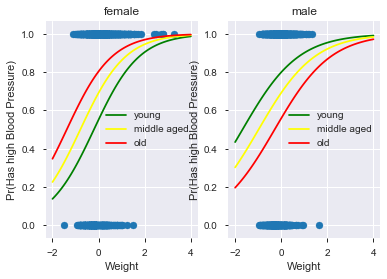

In [244]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

p = fit.params
X = np.linspace(-2,4,100)
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(fram.sFRW[(fram.SEX=="female")], fram.HIGH_BP[(fram.SEX=="female")])
ax[0].set_title("female")
ax[0].set_xlabel("Weight")
ax[0].set_ylabel("Pr(Has high Blood Pressure)")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept - p["sAGE"]), color='green', label="young")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept), color='yellow', label="middle aged")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept + p["sAGE"]), color='red', label="old")
ax[0].legend()

ax[1].scatter(fram.sFRW[(fram.SEX=="male")], fram.HIGH_BP[(fram.SEX=="male")])
ax[1].set_title("male")
ax[1].set_xlabel("Weight")
ax[1].set_ylabel("Pr(Has high Blood Pressure)")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept - p["sAGE:SEX[T.male]"]), color='green', label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept), color='yellow', label="middle aged")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept + p["sAGE:SEX[T.male]"]), color='red', label="old")
ax[1].legend()
# plt.title("Exercise 11 - Weight vs. Blood Pressure of each gender")

How do the models with different ages and genders differ from each other?

***
Your solution here.
***
**My Solution:**
1. It is important to recognize that the logistic curves based on age groups is reversed in male and female. 
2. Younger females have lower blood pressure when they have lower weight and the same case is reversed for men. 
3. So Older females have higher blood pressure if they have higher weight. While younger men have higher blood pressure if
    they have higher weight. 

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [138]:
# exercise 12
# Put your solution here!
np.random.seed(1)
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac = train_fraction)
    test = df.drop(train.index)
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [245]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model=[]
error_null=[]
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + SEX:sAGE + sFRW:sAGE", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

print("Mean Error : %.5f Mean Null Error : %.5f" % (pd.Series(error_model).mean(), pd.Series(error_null).mean()))

Mean Error : 0.33118 Mean Null Error : 0.34885


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [248]:
# exercise 14
# Put your solution here!
# print(sum(fram.CHD > 0))
fram['hasCHD'] = (fram.CHD > 0).astype('int') 
# print(sum(fram['hasCHD']))

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [249]:
# exercise 15
# Put your solution here!
fit = smf.logit('hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW', data=fram).fit()
print(fit.summary())
error_rate = np.mean(((fit.fittedvalues < 0) & fram.hasCHD) | ((fit.fittedvalues > 0) & ~fram.hasCHD))
print("Error Rate for newer model : %.5f" % (error_rate))

Optimization terminated successfully.
         Current function value: 0.517354
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                          Logit   Df Residuals:                     1387
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 May 2020   Pseudo R-squ.:                 0.01867
Time:                        17:43:38   Log-Likelihood:                -721.19
converged:                       True   LL-Null:                       -734.91
Covariance Type:            nonrobust   LLR p-value:                 0.0001194
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.000      -1.421      -1.157
sCHOL          0.3324      0.

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

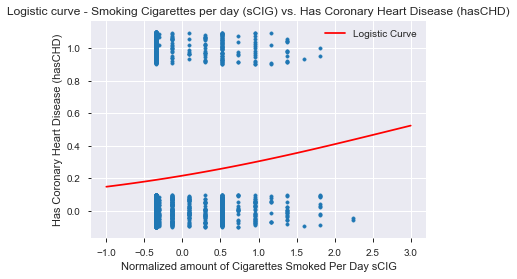

In [253]:
# exercise 16 TODO
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
p = fit.params
X = np.linspace(-1,3,100)
plt.scatter(fram["sCIG"], fram["hasCHD"] + np.random.uniform(-0.10, 0.10, len(fram)), marker = ".")
plt.plot(X, logistic(X*(p.sCIG) + p.Intercept), color="red", label="Logistic Curve")
plt.title("Logistic curve - Smoking Cigarettes per day (sCIG) vs. Has Coronary Heart Disease (hasCHD)")
plt.xlabel("Normalized amount of Cigarettes Smoked Per Day sCIG")
plt.ylabel("Has Coronary Heart Disease (hasCHD)")
plt.legend()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***
**My Solution:**
1. The above Model had a prediction accuracy of around 78% 
2. It can be used with caution in practical use. 
3. The prediction accuracy of the model is good. 

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [257]:
# exercise 17
# Put your solution here!
vals = pd.DataFrame([[200,17,100]],columns=['sCHOL', 'sCIG', 'sFRW'])

point = {}
for ind in vals:
    col = ind[1:]
    temp = fram[col].append(vals[ind])
    point[ind] = rescale(temp).iloc[-1]

predicted = fit.predict(point).iloc[0]
print("Probability that the new person had Heart Disease is : %.5f" % (predicted * 100))

Probability that the new person had Heart Disease is : 21.61580
